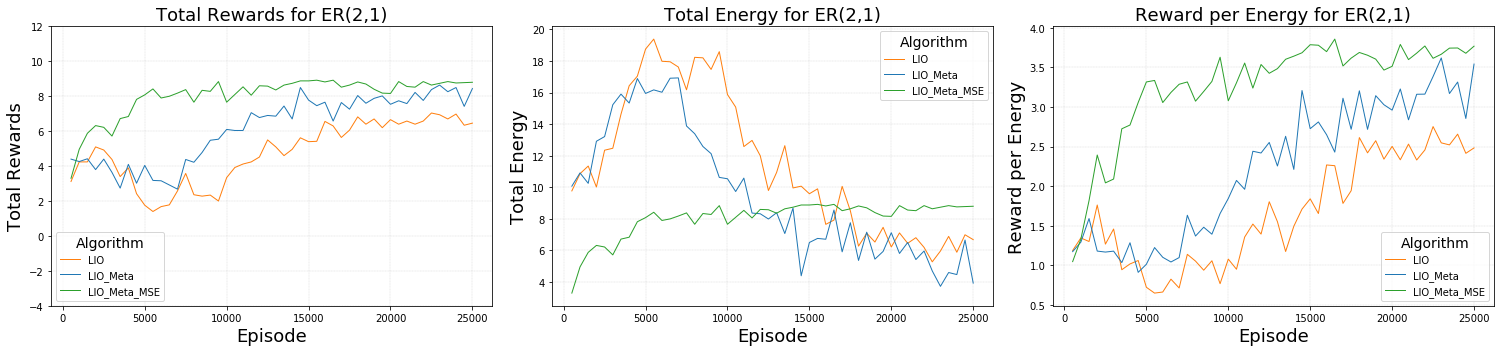

In [61]:
# Overall performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(2,1) environment with normal agents
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_all_LIO = []
df_all_LIO_Meta = []
df_all_LIO_Meta_MSE = []
for i in range(5):
    df_all_LIO.append(pd.read_csv(f'lio/results/er%d/LIO_test_ER21/log.csv'%(i+1)))
    df_all_LIO_Meta.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_test_ER21/log.csv'%(i+1)))
    df_all_LIO_Meta_MSE.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_MSE_ER21/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_LIO + df_all_LIO_Meta + df_all_LIO_Meta_MSE])
t = df_all_LIO[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot: collective return
signal1 = np.zeros((len(df_all_LIO), min_length))  # LIO
signal2 = np.zeros((len(df_all_LIO_Meta), min_length))    # LIO_Meta
signal3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))    # LIO_Meta_MSE

# Fill arrays with data from each run
for idx, df in enumerate(df_all_LIO):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    signal3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])

# Plot 1: Total Rewards 
mins1 = np.min(signal1, axis=0)
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)

mins3 = np.min(signal3, axis=0)
maxs3 = np.max(signal3, axis=0)
means3 = np.mean(signal3, axis=0)

# ax1.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:orange')
ax1.plot(t, means1, color='tab:orange', label='LIO', linewidth=1)
# ax1.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:blue')
ax1.plot(t, means2, color='tab:blue', label='LIO_Meta', linewidth=1)
# ax1.fill_between(t, mins3, maxs3, alpha=0.3, color='tab:blue')
ax1.plot(t, means3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(2,1)', fontsize=18)
ax1.legend(title='Algorithm', title_fontsize=14, loc='best')
ax1.set_ylim(-4, 12)

# Process collective energy data for second plot
energy1 = np.zeros((len(df_all_LIO), min_length)) # LIO
energy2 = np.zeros((len(df_all_LIO_Meta), min_length)) # LIO_Meta
energy3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length)) # LIO_Meta_MSE

for idx, df in enumerate(df_all_LIO):
    energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    energy3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])


# Plot 2: Total Energy 
mins_e1 = np.min(energy1, axis=0)
maxs_e1 = np.max(energy1, axis=0)
means_e1 = np.mean(energy1, axis=0)

mins_e2 = np.min(energy2, axis=0)
maxs_e2 = np.max(energy2, axis=0)
means_e2 = np.mean(energy2, axis=0)

mins_e3 = np.min(energy3, axis=0)
maxs_e3 = np.max(energy3, axis=0)
means_e3 = np.mean(energy3, axis=0)

# ax2.fill_between(t, mins_e1, maxs_e1, alpha=0.3, color='tab:orange')
ax2.plot(t, means_e1, color='tab:orange', label='LIO', linewidth=1)
# ax2.fill_between(t, mins_e2, maxs_e2, alpha=0.3, color='tab:blue')
ax2.plot(t, means_e2, color='tab:blue', label='LIO_Meta', linewidth=1)
ax2.plot(t, means_e3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)


ax2.grid(color='silver', linestyle='--', linewidth=0.3)
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(2,1)', fontsize=18)
ax2.legend(title='Algorithm', title_fontsize=14, loc='best')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_LIO), min_length))
rpe2 = np.zeros((len(df_all_LIO_Meta), min_length))
rpe3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))

for idx, df in enumerate(df_all_LIO):
    rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    rpe3[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length])


# Plot 3: Reward per Energy 
mins_r1 = np.min(rpe1, axis=0)
maxs_r1 = np.max(rpe1, axis=0)
means_r1 = np.mean(rpe1, axis=0)

mins_r2 = np.min(rpe2, axis=0)
maxs_r2 = np.max(rpe2, axis=0)
means_r2 = np.mean(rpe2, axis=0)

mins_r3 = np.min(rpe3, axis=0)
maxs_r3 = np.max(rpe3, axis=0)
means_r3 = np.mean(rpe3, axis=0)

# ax3.fill_between(t, mins_r1, maxs_r1, alpha=0.3, color='tab:orange')
ax3.plot(t, means_r1, color='tab:orange', label='LIO', linewidth=1)
# ax3.fill_between(t, mins_r2, maxs_r2, alpha=0.3, color='tab:blue')
ax3.plot(t, means_r2, color='tab:blue', label='LIO_Meta', linewidth=1)
ax3.plot(t, means_r3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)

ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(2,1)', fontsize=18)
ax3.legend(title='Algorithm', title_fontsize=14, loc='best')

plt.tight_layout()
plt.show()


# Save figure
fig.savefig('Overall_performance_ER(2,1).png', dpi=300)






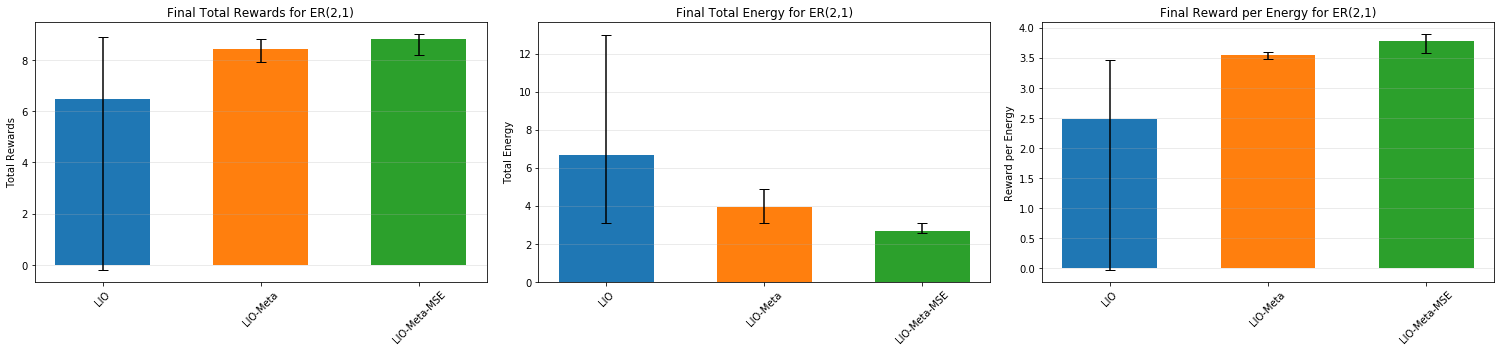

In [ ]:
# Final cumulative performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(2,1) environment with normal agents
# Plot final performance of the three algorithms in bar charts
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# Load data
df_all_LIO = []
df_all_LIO_Meta = []
df_all_LIO_Meta_MSE = []
methods = ['LIO', 'LIO-Meta', 'LIO-Meta-MSE']
for i in range(5):
    df_all_LIO.append(pd.read_csv(f'lio/results/er%d/LIO_test_ER21/log.csv'%(i+1)))
    df_all_LIO_Meta.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_test_ER21/log.csv'%(i+1)))
    df_all_LIO_Meta_MSE.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_MSE_ER21/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_LIO + df_all_LIO_Meta + df_all_LIO_Meta_MSE])
t = df_all_LIO[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot: collective return
signal1 = np.zeros((len(df_all_LIO), min_length))  # LIO
signal2 = np.zeros((len(df_all_LIO_Meta), min_length))    # LIO_Meta
signal3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))    # LIO_Meta_MSE

# Fill arrays with data from each run
for idx, df in enumerate(df_all_LIO):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    signal3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])

# Plot 1: Total Rewards 
# Get the last episode data
finalr1 = signal1[:,-1]  # LIO
finalr2 = signal2[:,-1]  # LIO_Meta
finalr3 = signal3[:,-1]  # LIO_Meta_MSE

mins_finalr1 = np.min(finalr1, axis=0)
maxs_finalr1 = np.max(finalr1, axis=0)
means_finalr1 = np.mean(finalr1, axis=0)

mins_finalr2 = np.min(finalr2, axis=0)
maxs_finalr2 = np.max(finalr2, axis=0)
means_finalr2 = np.mean(finalr2, axis=0)

mins_finalr3 = np.min(finalr3, axis=0)
maxs_finalr3 = np.max(finalr3, axis=0)
means_finalr3 = np.mean(finalr3, axis=0)

means_finalr = [means_finalr1,  means_finalr2, means_finalr3]
yerr = np.array([
    [means_finalr1 - mins_finalr1, means_finalr2 - mins_finalr2, means_finalr3 - mins_finalr3],  # lower errors
    [maxs_finalr1 - means_finalr1, maxs_finalr2 - means_finalr2, maxs_finalr3 - means_finalr3]   # upper errors
])


# Create bars
x_pos = np.arange(len(methods))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax1.set_title('Final Total Rewards for ER(2,1)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(methods, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process collective energy data for second plot
energy1 = np.zeros((len(df_all_LIO), min_length)) # LIO
energy2 = np.zeros((len(df_all_LIO_Meta), min_length)) # LIO_Meta
energy3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length)) # LIO_Meta_MSE

for idx, df in enumerate(df_all_LIO):
    energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta):
    energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    energy3[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length])


# Plot 2: Total Energy
# Get the last episode data
finale1 = energy1[:,-1]  # LIO
finale2 = energy2[:,-1]  # LIO_Meta
finale3 = energy3[:,-1]  # LIO_Meta_MSE

mins_finale1 = np.min(finale1, axis=0)
maxs_finale1 = np.max(finale1, axis=0)
means_finale1 = np.mean(finale1, axis=0)

mins_finale2 = np.min(finale2, axis=0)
maxs_finale2 = np.max(finale2, axis=0)
means_finale2 = np.mean(finale2, axis=0)

mins_finale3 = np.min(finale3, axis=0)
maxs_finale3 = np.max(finale3, axis=0)
means_finale3 = np.mean(finale3, axis=0)

means_finale = [means_finale1,  means_finale2, means_finale3]
yere = np.array([
    [means_finale1 - mins_finale1, means_finale2 - mins_finale2, means_finale3 - mins_finale3],  # lower errors
    [maxs_finale1 - means_finale1, maxs_finale2 - means_finale2, maxs_finale3 - means_finale3]   # upper errors
])


# Create bars
x_pos = np.arange(len(methods))
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yere,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax2.set_title('Final Total Energy for ER(2,1)', fontsize=12)
ax2.set_ylabel('Total Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(methods, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_LIO), min_length))
rpe2 = np.zeros((len(df_all_LIO_Meta), min_length))
rpe3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))

for idx, df in enumerate(df_all_LIO):
    rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta_MSE):
    rpe3[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length])
    

# Plot 3: Reward per Energy
# Get the last episode data
finalrpe1 = rpe1[:,-1]  # LIO
finalrpe2 = rpe2[:,-1]  # LIO_Meta
finalrpe3 = rpe3[:,-1]  # LIO_Meta_MSE

mins_finalrpe1 = np.min(finalrpe1, axis=0)
maxs_finalrpe1 = np.max(finalrpe1, axis=0)
means_finalrpe1 = np.mean(finalrpe1, axis=0)

mins_finalrpe2 = np.min(finalrpe2, axis=0)
maxs_finalrpe2 = np.max(finalrpe2, axis=0)
means_finalrpe2 = np.mean(finalrpe2, axis=0)

mins_finalrpe3 = np.min(finalrpe3, axis=0)
maxs_finalrpe3 = np.max(finalrpe3, axis=0)
means_finalrpe3 = np.mean(finalrpe3, axis=0)

means_finalrpe = [means_finalrpe1,  means_finalrpe2, means_finalrpe3]
yerrpe = np.array([
    [means_finalrpe1 - mins_finalrpe1, means_finalrpe2 - mins_finalrpe2, means_finalrpe3 - mins_finalrpe3],  # lower errors
    [maxs_finalrpe1 - means_finalrpe1, maxs_finalrpe2 - means_finalrpe2, maxs_finalrpe3 - means_finalrpe3]   # upper errors
])




# Create bars
x_pos = np.arange(len(methods))

bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerrpe,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax3.set_title('Final Reward per Energy for ER(2,1)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(methods, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('final_performance_ER(2,1).png', dpi=300)









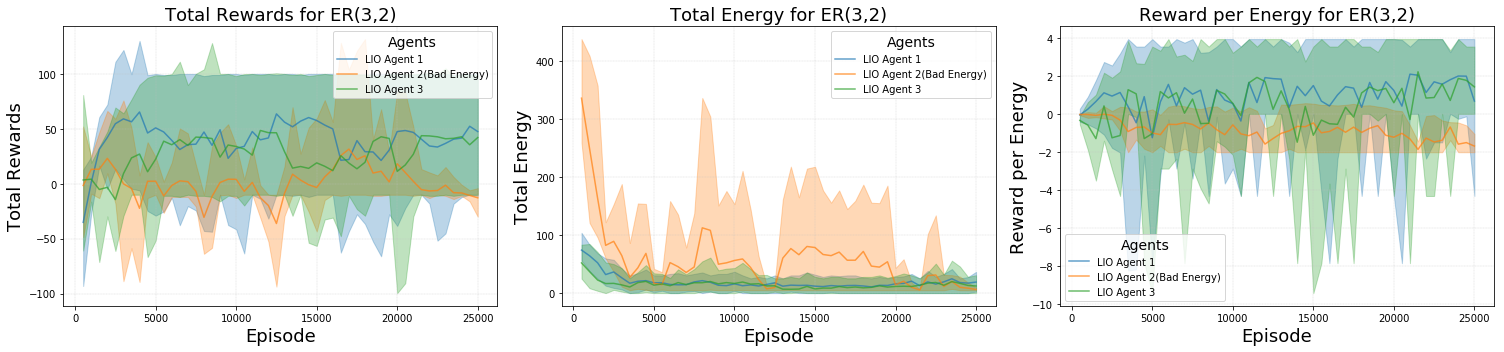

In [62]:
# Overall performance comparison of LIO in the ER(3,2) environment with the 2nd agent having bad energy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_BadEnergy_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_bad_energy_overall.png', dpi=300)



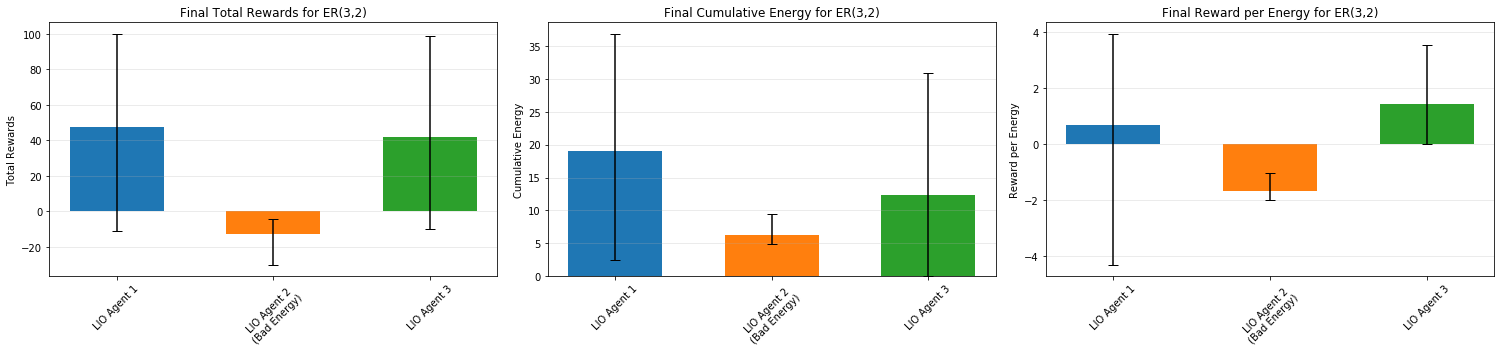

In [63]:
# Final cumulative performance comparison of LIO in the ER(3,2) environment with the 2nd agent having bad energy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_BadEnergy_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO Agent 1', 'LIO Agent 2\n(Bad Energy)', 'LIO Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_bad_energy_final.png', dpi=300)

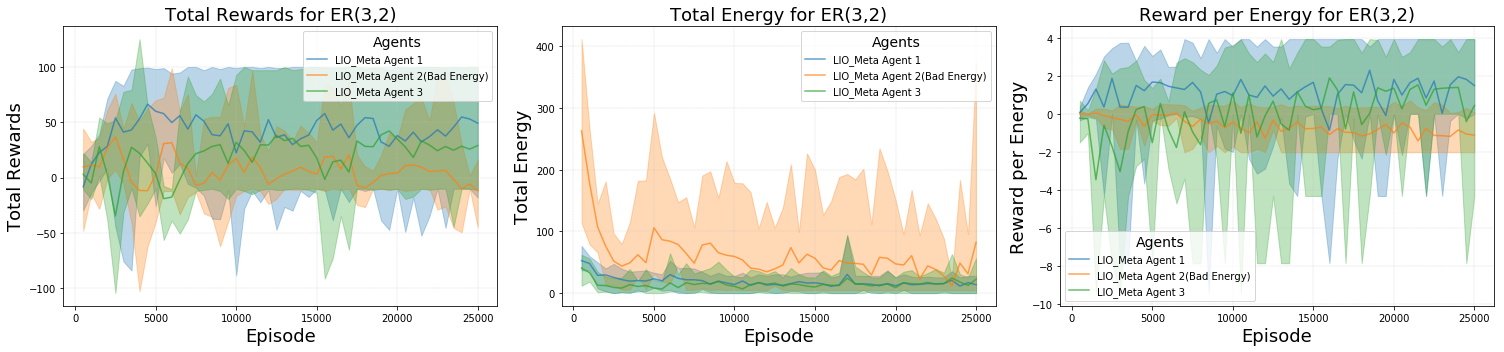

In [64]:
# Overall performance comparison of LIO_Meta in the ER(3,2) environment with the 2nd agent having bad energy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_BadEnergy_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO_Meta Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO_Meta Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO_Meta Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_meta_bad_energy_overall.png', dpi=300)

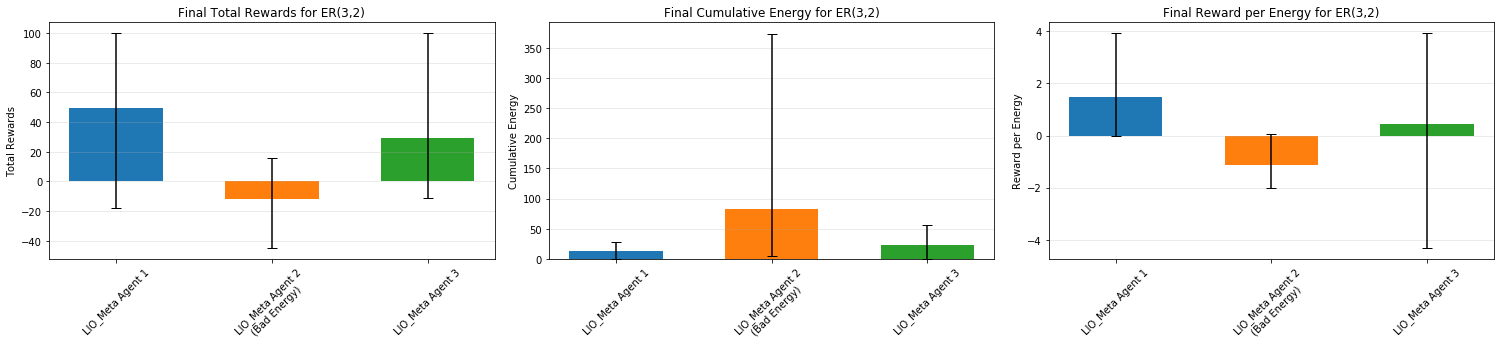

In [66]:
# Final cumulative performance comparison of LIO_Meta in the ER(3,2) environment with the 2nd agent having bad energy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_BadEnergy_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO_Meta Agent 1', 'LIO_Meta Agent 2\n(Bad Energy)', 'LIO_Meta Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_meta_bad_energy_final.png', dpi=300)

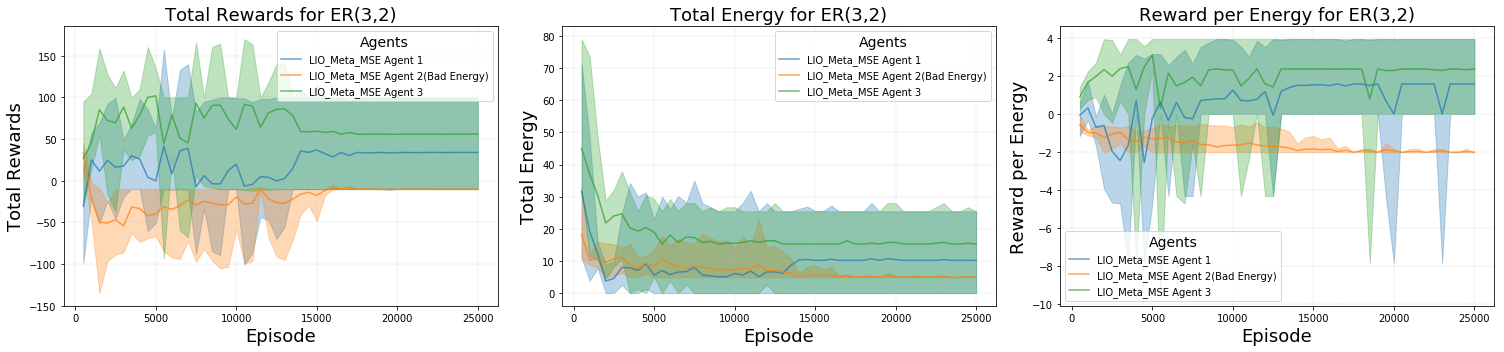

In [67]:
# Overall performance comparison of LIO_Meta_MSE in the ER(3,2) environment with the 2nd agent having bad energy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_MSE_BadEnergy_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}{"(Bad Energy)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_meta_mse_bad_energy_overall.png', dpi=300)

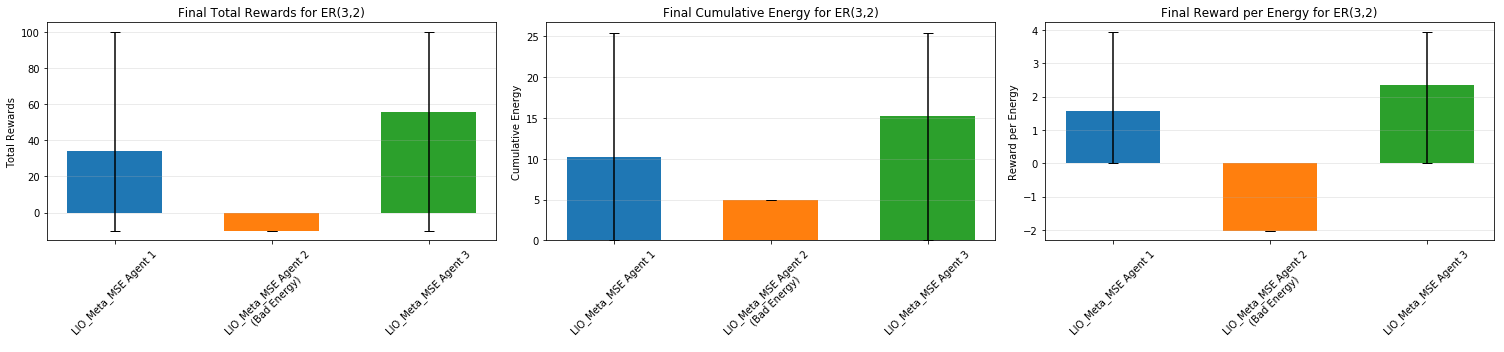

In [68]:
# Final cumulative performance comparison of LIO_Meta_MSE in the ER(3,2) environment with the 2nd agent having bad energy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_MSE_BadEnergy_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO_Meta_MSE Agent 1', 'LIO_Meta_MSE Agent 2\n(Bad Energy)', 'LIO_Meta_MSE Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_meta_mse_bad_energy_final.png', dpi=300)

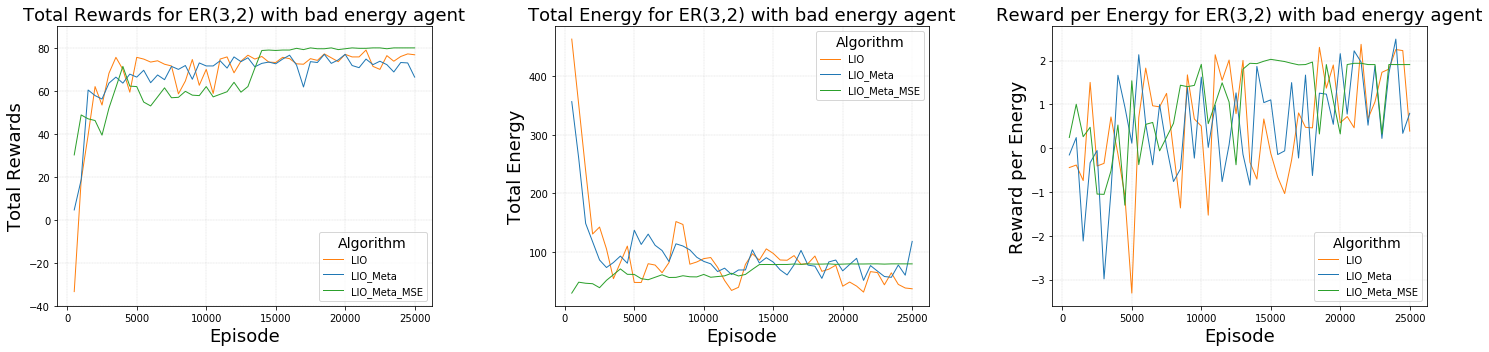

In [70]:
# Overall performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(3,2) environment with 2nd agent having bad energy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_all_LIO = []
df_all_LIO_Meta = []
df_all_LIO_Meta_MSE = []
for i in range(5):
    df_all_LIO.append(pd.read_csv(f'lio/results/er%d/LIO_BadEnergy_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_BadEnergy_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta_MSE.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_MSE_BadEnergy_test_ER32/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_LIO + df_all_LIO_Meta + df_all_LIO_Meta_MSE])
t = df_all_LIO[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot: collective return
signal1 = np.zeros((len(df_all_LIO), min_length))  # LIO
signal2 = np.zeros((len(df_all_LIO_Meta), min_length))    # LIO_Meta
signal3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))    # LIO_Meta_MSE

# Fill arrays with data from each run
for idx, df in enumerate(df_all_LIO):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] + 
                   df['A3_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                    df['A3_reward_total'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    signal3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                   df['A3_reward_total'].values[:min_length])

# Plot 1: Total Rewards 
mins1 = np.min(signal1, axis=0)# Overall performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(3,2) environment with 2nd agent having bad energy
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)

mins3 = np.min(signal3, axis=0)
maxs3 = np.max(signal3, axis=0)
means3 = np.mean(signal3, axis=0)

# ax1.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:orange')
ax1.plot(t, means1, color='tab:orange', label='LIO', linewidth=1)
# ax1.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:blue')
ax1.plot(t, means2, color='tab:blue', label='LIO_Meta', linewidth=1)
# ax1.fill_between(t, mins3, maxs3, alpha=0.3, color='tab:blue')
ax1.plot(t, means3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2) with bad energy agent', fontsize=18)
ax1.legend(title='Algorithm', title_fontsize=14, loc='best')
ax1.set_ylim(-40, 90)

# Process collective energy data for second plot
energy1 = np.zeros((len(df_all_LIO), min_length)) # LIO
energy2 = np.zeros((len(df_all_LIO_Meta), min_length)) # LIO_Meta
energy3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length)) # LIO_Meta_MSE

for idx, df in enumerate(df_all_LIO):
    energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length] +
                   df['A3_total_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length] +
                   df['A3_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    energy3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                   df['A3_reward_total'].values[:min_length])


# Plot 2: Total Energy 
mins_e1 = np.min(energy1, axis=0)
maxs_e1 = np.max(energy1, axis=0)
means_e1 = np.mean(energy1, axis=0)

mins_e2 = np.min(energy2, axis=0)
maxs_e2 = np.max(energy2, axis=0)
means_e2 = np.mean(energy2, axis=0)

mins_e3 = np.min(energy3, axis=0)
maxs_e3 = np.max(energy3, axis=0)
means_e3 = np.mean(energy3, axis=0)

# ax2.fill_between(t, mins_e1, maxs_e1, alpha=0.3, color='tab:orange')
ax2.plot(t, means_e1, color='tab:orange', label='LIO', linewidth=1)
# ax2.fill_between(t, mins_e2, maxs_e2, alpha=0.3, color='tab:blue')
ax2.plot(t, means_e2, color='tab:blue', label='LIO_Meta', linewidth=1)
ax2.plot(t, means_e3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)


ax2.grid(color='silver', linestyle='--', linewidth=0.3)
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2) with bad energy agent', fontsize=18)
ax2.legend(title='Algorithm', title_fontsize=14, loc='best')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_LIO), min_length))
rpe2 = np.zeros((len(df_all_LIO_Meta), min_length))
rpe3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))

for idx, df in enumerate(df_all_LIO):
    rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    rpe3[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])


# Plot 3: Reward per Energy 
mins_r1 = np.min(rpe1, axis=0)
maxs_r1 = np.max(rpe1, axis=0)
means_r1 = np.mean(rpe1, axis=0)

mins_r2 = np.min(rpe2, axis=0)
maxs_r2 = np.max(rpe2, axis=0)
means_r2 = np.mean(rpe2, axis=0)

mins_r3 = np.min(rpe3, axis=0)
maxs_r3 = np.max(rpe3, axis=0)
means_r3 = np.mean(rpe3, axis=0)

# ax3.fill_between(t, mins_r1, maxs_r1, alpha=0.3, color='tab:orange')
ax3.plot(t, means_r1, color='tab:orange', label='LIO', linewidth=1)
# ax3.fill_between(t, mins_r2, maxs_r2, alpha=0.3, color='tab:blue')
ax3.plot(t, means_r2, color='tab:blue', label='LIO_Meta', linewidth=1)
ax3.plot(t, means_r3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)

ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2) with bad energy agent', fontsize=18)
ax3.legend(title='Algorithm', title_fontsize=14, loc='best')

plt.tight_layout()
plt.show()


# Save figure
fig.savefig('Overall_performance_bad_energy.png', dpi=300)

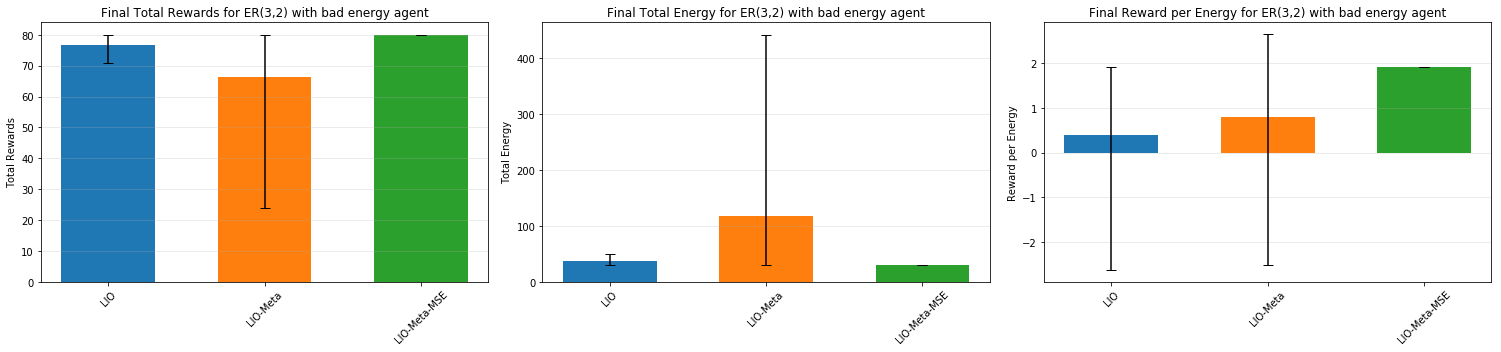

In [71]:
# Final cumulative performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(3,2) environment with 2nd agent having bad energy
# Plot final performance of the three algorithms in bar charts
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# Load data
df_all_LIO = []
df_all_LIO_Meta = []
df_all_LIO_Meta_MSE = []
methods = ['LIO', 'LIO-Meta', 'LIO-Meta-MSE']
for i in range(5):
    df_all_LIO.append(pd.read_csv(f'lio/results/er%d/LIO_BadEnergy_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_BadEnergy_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta_MSE.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_MSE_BadEnergy_test_ER32/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_LIO + df_all_LIO_Meta + df_all_LIO_Meta_MSE])
t = df_all_LIO[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot: collective return
signal1 = np.zeros((len(df_all_LIO), min_length))  # LIO
signal2 = np.zeros((len(df_all_LIO_Meta), min_length))    # LIO_Meta
signal3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))    # LIO_Meta_MSE

# Fill arrays with data from each run
for idx, df in enumerate(df_all_LIO):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] + 
                   df['A3_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                    df['A3_reward_total'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    signal3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                   df['A3_reward_total'].values[:min_length])


# Plot 1: Total Rewards 
# Get the last episode data
finalr1 = signal1[:,-1]  # LIO
finalr2 = signal2[:,-1]  # LIO_Meta
finalr3 = signal3[:,-1]  # LIO_Meta_MSE

mins_finalr1 = np.min(finalr1, axis=0)
maxs_finalr1 = np.max(finalr1, axis=0)
means_finalr1 = np.mean(finalr1, axis=0)

mins_finalr2 = np.min(finalr2, axis=0)
maxs_finalr2 = np.max(finalr2, axis=0)
means_finalr2 = np.mean(finalr2, axis=0)

mins_finalr3 = np.min(finalr3, axis=0)
maxs_finalr3 = np.max(finalr3, axis=0)
means_finalr3 = np.mean(finalr3, axis=0)

means_finalr = [means_finalr1,  means_finalr2, means_finalr3]
yerr = np.array([
    [means_finalr1 - mins_finalr1, means_finalr2 - mins_finalr2, means_finalr3 - mins_finalr3],  # lower errors
    [maxs_finalr1 - means_finalr1, maxs_finalr2 - means_finalr2, maxs_finalr3 - means_finalr3]   # upper errors
])


# Create bars
x_pos = np.arange(len(methods))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax1.set_title('Final Total Rewards for ER(3,2) with bad energy agent', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(methods, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process collective energy data for second plot
energy1 = np.zeros((len(df_all_LIO), min_length)) # LIO
energy2 = np.zeros((len(df_all_LIO_Meta), min_length)) # LIO_Meta
energy3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length)) # LIO_Meta_MSE



for idx, df in enumerate(df_all_LIO):
    energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length]
                   + df['A3_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta):
    energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length]
                   + df['A3_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    energy3[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length]
                   + df['A3_total_energy'].values[:min_length])


# Plot 2: Total Energy
# Get the last episode data
finale1 = energy1[:,-1]  # LIO
finale2 = energy2[:,-1]  # LIO_Meta
finale3 = energy3[:,-1]  # LIO_Meta_MSE

mins_finale1 = np.min(finale1, axis=0)
maxs_finale1 = np.max(finale1, axis=0)
means_finale1 = np.mean(finale1, axis=0)

mins_finale2 = np.min(finale2, axis=0)
maxs_finale2 = np.max(finale2, axis=0)
means_finale2 = np.mean(finale2, axis=0)

mins_finale3 = np.min(finale3, axis=0)
maxs_finale3 = np.max(finale3, axis=0)
means_finale3 = np.mean(finale3, axis=0)

means_finale = [means_finale1,  means_finale2, means_finale3]
yere = np.array([
    [means_finale1 - mins_finale1, means_finale2 - mins_finale2, means_finale3 - mins_finale3],  # lower errors
    [maxs_finale1 - means_finale1, maxs_finale2 - means_finale2, maxs_finale3 - means_finale3]   # upper errors
])


# Create bars
x_pos = np.arange(len(methods))
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yere,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax2.set_title('Final Total Energy for ER(3,2) with bad energy agent', fontsize=12)
ax2.set_ylabel('Total Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(methods, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_LIO), min_length))
rpe2 = np.zeros((len(df_all_LIO_Meta), min_length))
rpe3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))

for idx, df in enumerate(df_all_LIO):
    rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length]
                   + df['A3_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length]
                   + df['A3_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta_MSE):
    rpe3[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length]
                   + df['A3_reward_per_energy'].values[:min_length])
    

# Plot 3: Reward per Energy
# Get the last episode data
finalrpe1 = rpe1[:,-1]  # LIO
finalrpe2 = rpe2[:,-1]  # LIO_Meta
finalrpe3 = rpe3[:,-1]  # LIO_Meta_MSE

mins_finalrpe1 = np.min(finalrpe1, axis=0)
maxs_finalrpe1 = np.max(finalrpe1, axis=0)
means_finalrpe1 = np.mean(finalrpe1, axis=0)

mins_finalrpe2 = np.min(finalrpe2, axis=0)
maxs_finalrpe2 = np.max(finalrpe2, axis=0)
means_finalrpe2 = np.mean(finalrpe2, axis=0)

mins_finalrpe3 = np.min(finalrpe3, axis=0)
maxs_finalrpe3 = np.max(finalrpe3, axis=0)
means_finalrpe3 = np.mean(finalrpe3, axis=0)

means_finalrpe = [means_finalrpe1,  means_finalrpe2, means_finalrpe3]
yerrpe = np.array([
    [means_finalrpe1 - mins_finalrpe1, means_finalrpe2 - mins_finalrpe2, means_finalrpe3 - mins_finalrpe3],  # lower errors
    [maxs_finalrpe1 - means_finalrpe1, maxs_finalrpe2 - means_finalrpe2, maxs_finalrpe3 - means_finalrpe3]   # upper errors
])




# Create bars
x_pos = np.arange(len(methods))

bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerrpe,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax3.set_title('Final Reward per Energy for ER(3,2) with bad energy agent', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(methods, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('final_performance_bad_energy.png', dpi=300)

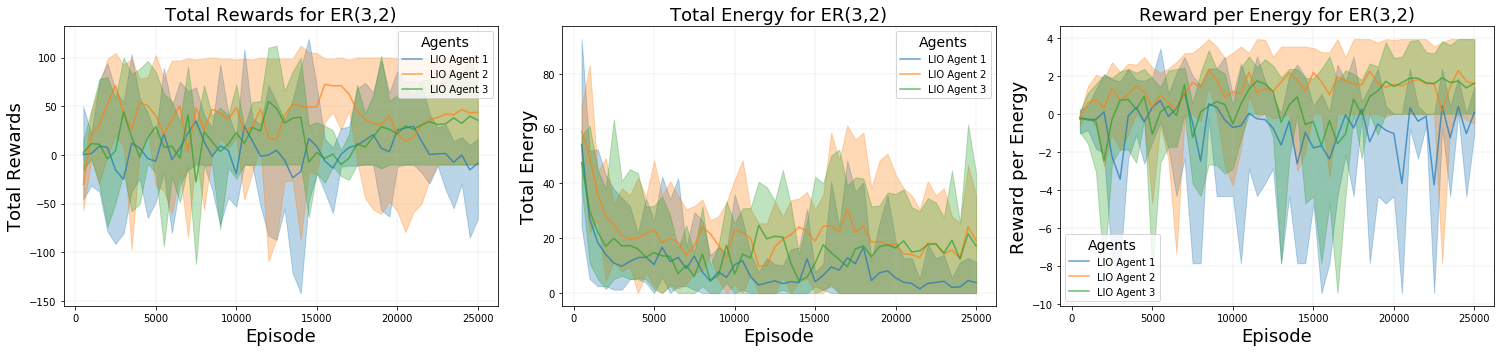

In [72]:
# Overall performance comparison of LIO in the ER(3,2) environment with normal agents
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO Agent {agent_id}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO Agent {agent_id}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO Agent {agent_id}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_normal_ER32_overall.png', dpi=300)

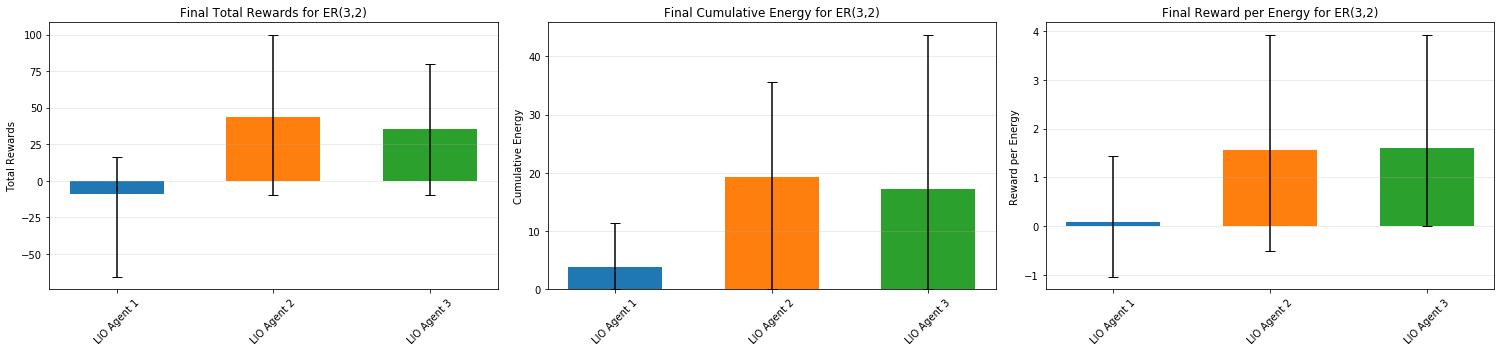

In [73]:
# Final cumulative performance comparison of LIO in the ER(3,2) environment with all normal agents 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO Agent 1', 'LIO Agent 2', 'LIO Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_normal_ER32_final.png', dpi=300)

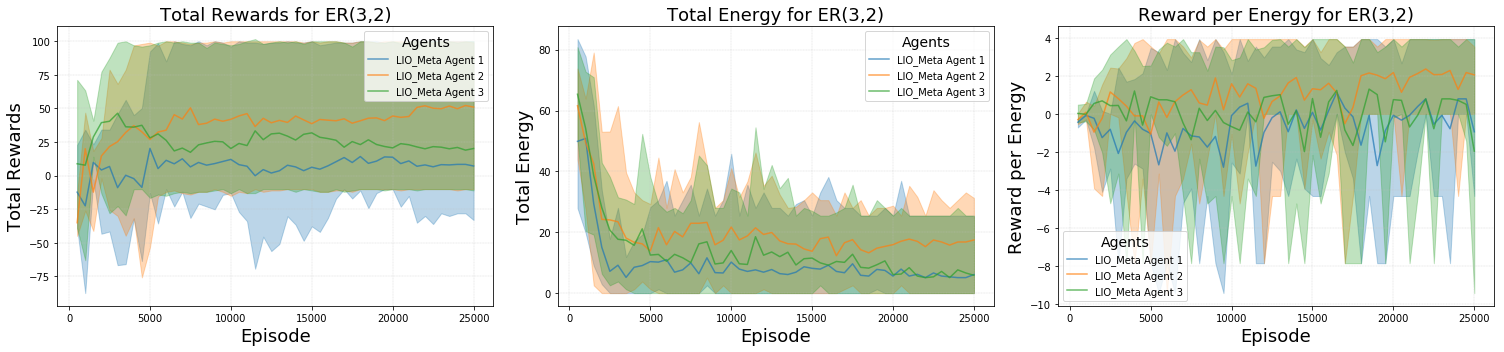

In [74]:
# Overall performance comparison of LIO_Meta in the ER(3,2) environment with the normal agents
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO_Meta Agent {agent_id}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO_Meta Agent {agent_id}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO_Meta Agent {agent_id}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_meta_overall_ER32_overall.png', dpi=300)

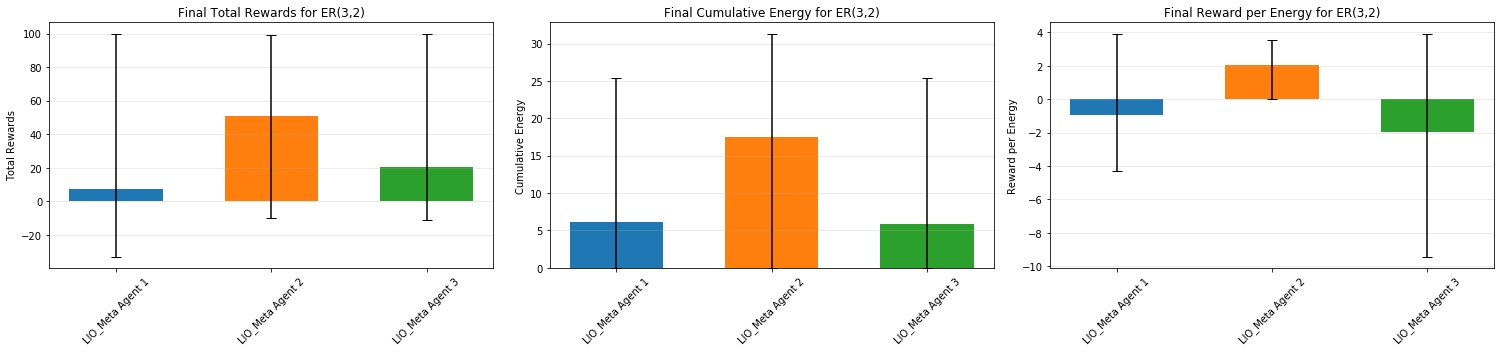

In [75]:
# Final cumulative performance comparison of LIO_Meta in the ER(3,2) environment with the all normal agents
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO_Meta Agent 1', 'LIO_Meta Agent 2', 'LIO_Meta Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_meta_normal_ER32_final.png', dpi=300)

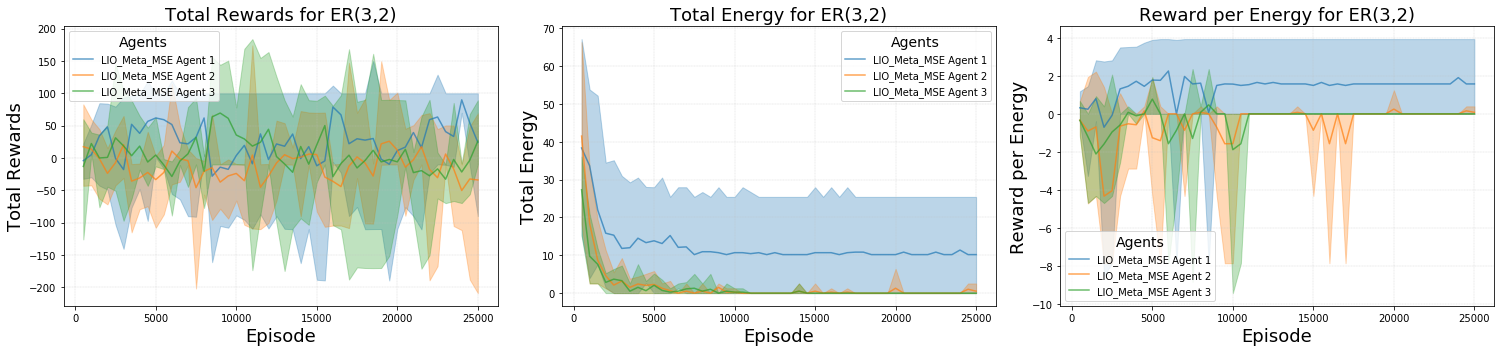

In [76]:
# Overall performance comparison of LIO_Meta_MSE in the ER(3,2) environment with all normal agents
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_MSE_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_meta_mse_normal_ER32_overall.png', dpi=300)

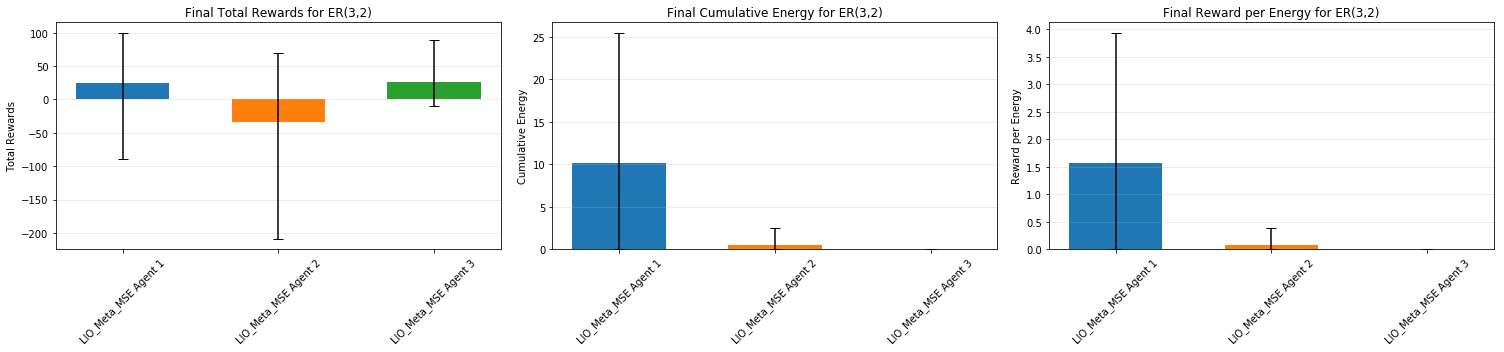

In [77]:
# Final cumulative performance comparison of LIO_Meta_MSE in the ER(3,2) environment with the all normal agents
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_MSE_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO_Meta_MSE Agent 1', 'LIO_Meta_MSE Agent 2', 'LIO_Meta_MSE Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_meta_mse_mormal_ER32_final.png', dpi=300)

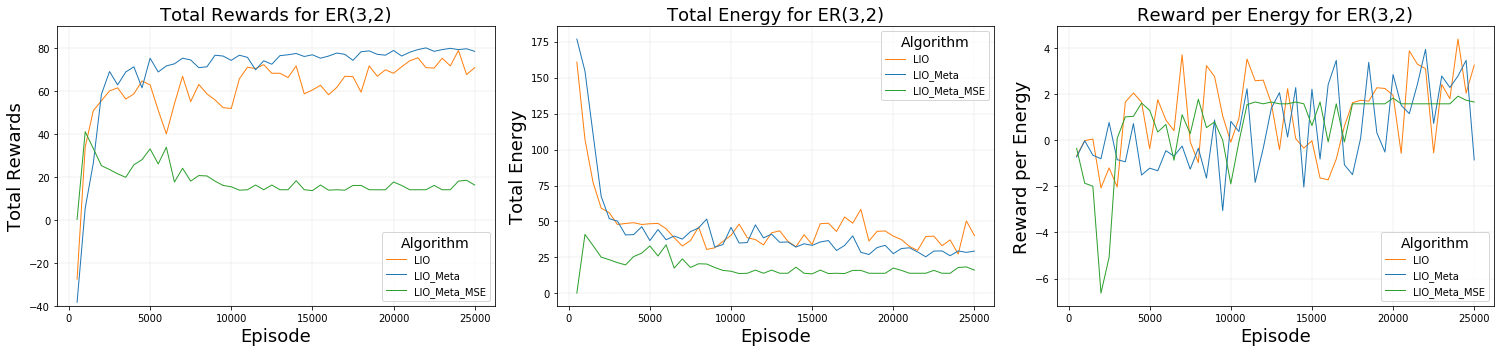

In [78]:
# Overall performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(3,2) environment with normal agents
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_all_LIO = []
df_all_LIO_Meta = []
df_all_LIO_Meta_MSE = []
for i in range(5):
    df_all_LIO.append(pd.read_csv(f'lio/results/er%d/LIO_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta_MSE.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_MSE_test_ER32/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_LIO + df_all_LIO_Meta + df_all_LIO_Meta_MSE])
t = df_all_LIO[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot: collective return
signal1 = np.zeros((len(df_all_LIO), min_length))  # LIO
signal2 = np.zeros((len(df_all_LIO_Meta), min_length))    # LIO_Meta
signal3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))    # LIO_Meta_MSE

# Fill arrays with data from each run
for idx, df in enumerate(df_all_LIO):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] + 
                   df['A3_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                    df['A3_reward_total'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    signal3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                   df['A3_reward_total'].values[:min_length])

# Plot 1: Total Rewards 
mins1 = np.min(signal1, axis=0)# Overall performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(3,2) environment with normal agents
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)

mins3 = np.min(signal3, axis=0)
maxs3 = np.max(signal3, axis=0)
means3 = np.mean(signal3, axis=0)

# ax1.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:orange')
ax1.plot(t, means1, color='tab:orange', label='LIO', linewidth=1)
# ax1.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:blue')
ax1.plot(t, means2, color='tab:blue', label='LIO_Meta', linewidth=1)
# ax1.fill_between(t, mins3, maxs3, alpha=0.3, color='tab:blue')
ax1.plot(t, means3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Algorithm', title_fontsize=14, loc='best')
ax1.set_ylim(-40, 90)

# Process collective energy data for second plot
energy1 = np.zeros((len(df_all_LIO), min_length)) # LIO
energy2 = np.zeros((len(df_all_LIO_Meta), min_length)) # LIO_Meta
energy3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length)) # LIO_Meta_MSE

for idx, df in enumerate(df_all_LIO):
    energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length] +
                   df['A3_total_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length] +
                   df['A3_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    energy3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                   df['A3_reward_total'].values[:min_length])


# Plot 2: Total Energy 
mins_e1 = np.min(energy1, axis=0)
maxs_e1 = np.max(energy1, axis=0)
means_e1 = np.mean(energy1, axis=0)

mins_e2 = np.min(energy2, axis=0)
maxs_e2 = np.max(energy2, axis=0)
means_e2 = np.mean(energy2, axis=0)

mins_e3 = np.min(energy3, axis=0)
maxs_e3 = np.max(energy3, axis=0)
means_e3 = np.mean(energy3, axis=0)

# ax2.fill_between(t, mins_e1, maxs_e1, alpha=0.3, color='tab:orange')
ax2.plot(t, means_e1, color='tab:orange', label='LIO', linewidth=1)
# ax2.fill_between(t, mins_e2, maxs_e2, alpha=0.3, color='tab:blue')
ax2.plot(t, means_e2, color='tab:blue', label='LIO_Meta', linewidth=1)
ax2.plot(t, means_e3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)


ax2.grid(color='silver', linestyle='--', linewidth=0.3)
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Algorithm', title_fontsize=14, loc='best')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_LIO), min_length))
rpe2 = np.zeros((len(df_all_LIO_Meta), min_length))
rpe3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))

for idx, df in enumerate(df_all_LIO):
    rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    rpe3[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])


# Plot 3: Reward per Energy 
mins_r1 = np.min(rpe1, axis=0)
maxs_r1 = np.max(rpe1, axis=0)
means_r1 = np.mean(rpe1, axis=0)

mins_r2 = np.min(rpe2, axis=0)
maxs_r2 = np.max(rpe2, axis=0)
means_r2 = np.mean(rpe2, axis=0)

mins_r3 = np.min(rpe3, axis=0)
maxs_r3 = np.max(rpe3, axis=0)
means_r3 = np.mean(rpe3, axis=0)

# ax3.fill_between(t, mins_r1, maxs_r1, alpha=0.3, color='tab:orange')
ax3.plot(t, means_r1, color='tab:orange', label='LIO', linewidth=1)
# ax3.fill_between(t, mins_r2, maxs_r2, alpha=0.3, color='tab:blue')
ax3.plot(t, means_r2, color='tab:blue', label='LIO_Meta', linewidth=1)
ax3.plot(t, means_r3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)

ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Algorithm', title_fontsize=14, loc='best')

plt.tight_layout()
plt.show()


# Save figure
fig.savefig('Overall_performance_normal_ER32.png', dpi=300)

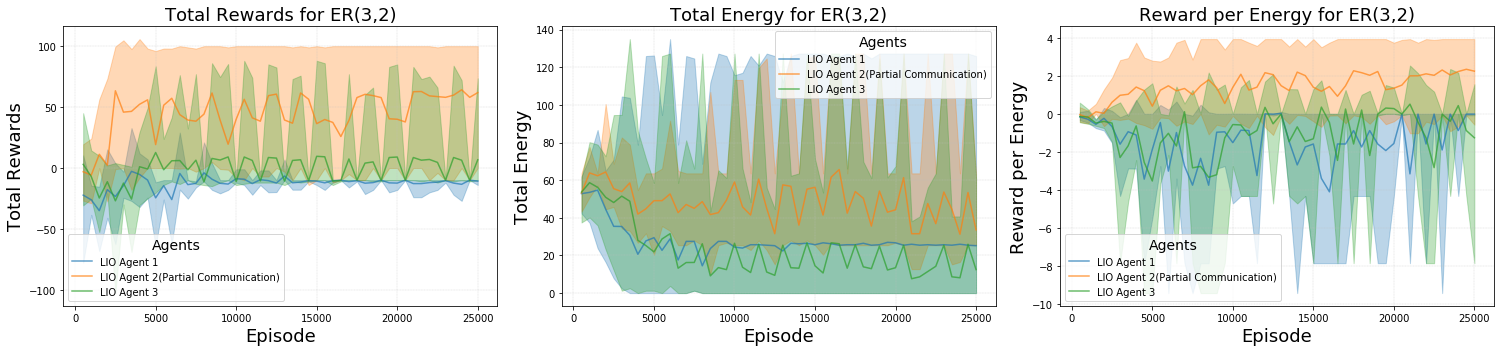

In [1]:
# Overall performance comparison of LIO in the ER(3,2) environment with greedy 2nd agent (Partial Communication)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Partial Communication_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_Partial Communication_overall.png', dpi=300)


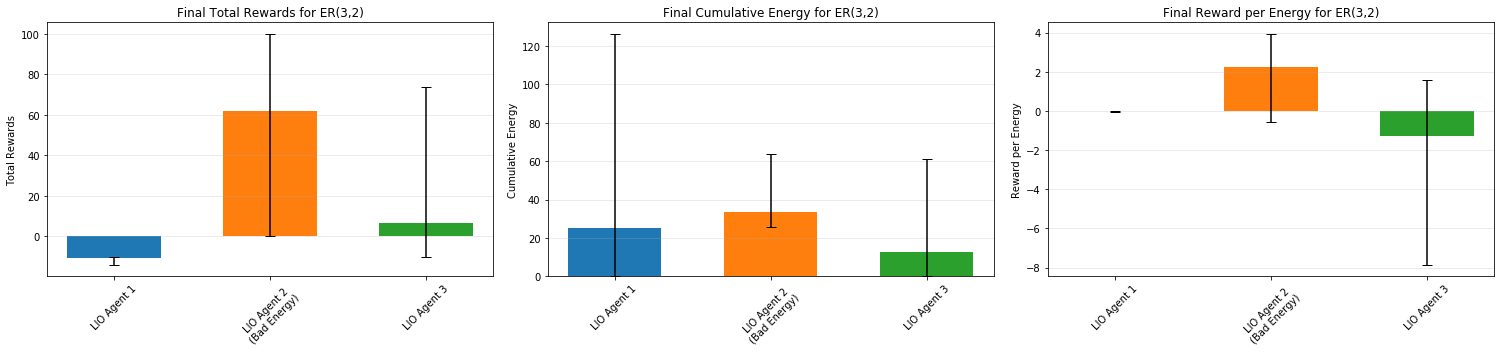

In [2]:
# Final cumulative performance comparison of LIO in the ER(3,2) environment with the greedy 2nd agent (Partial Communication)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Partial Communication_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO Agent 1', 'LIO Agent 2\n(Bad Energy)', 'LIO Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_Partial Communication_final.png', dpi=300)

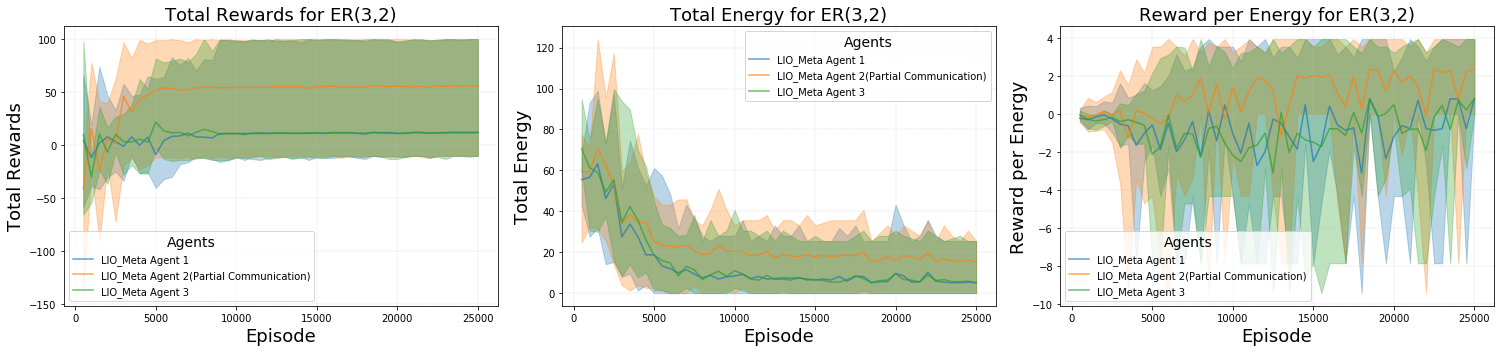

In [3]:
# Overall performance comparison of LIO_Meta in the ER(3,2) environment with greedy 2nd agent (Partial Communication)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_Partial Communication_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO_Meta Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO_Meta Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO_Meta Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_meta_Partial Communication_overall.png', dpi=300)

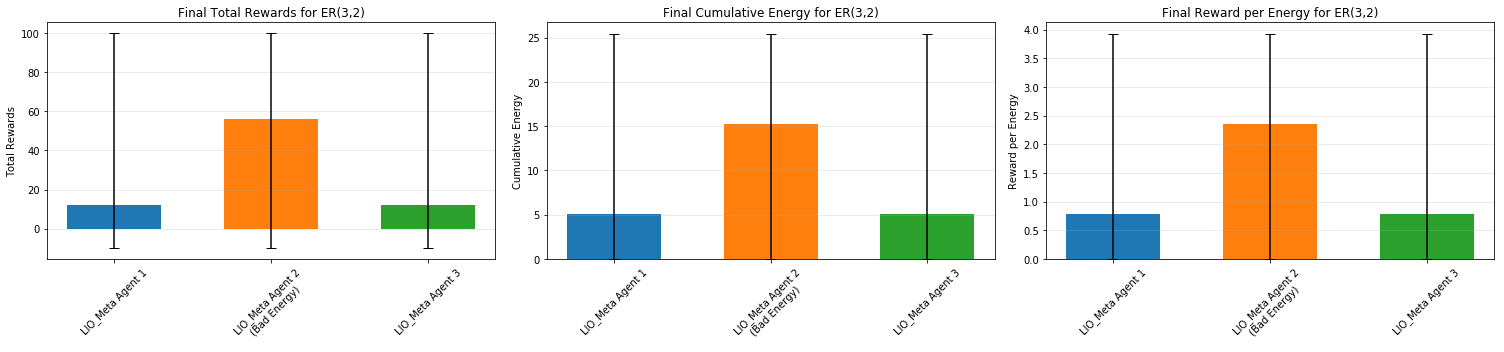

In [4]:
# Final cumulative performance comparison of LIO_Meta in the ER(3,2) environment with the greedy 2nd agent (Partial Communication)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_Partial Communication_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO_Meta Agent 1', 'LIO_Meta Agent 2\n(Bad Energy)', 'LIO_Meta Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_meta_Partial Communication_final.png', dpi=300)

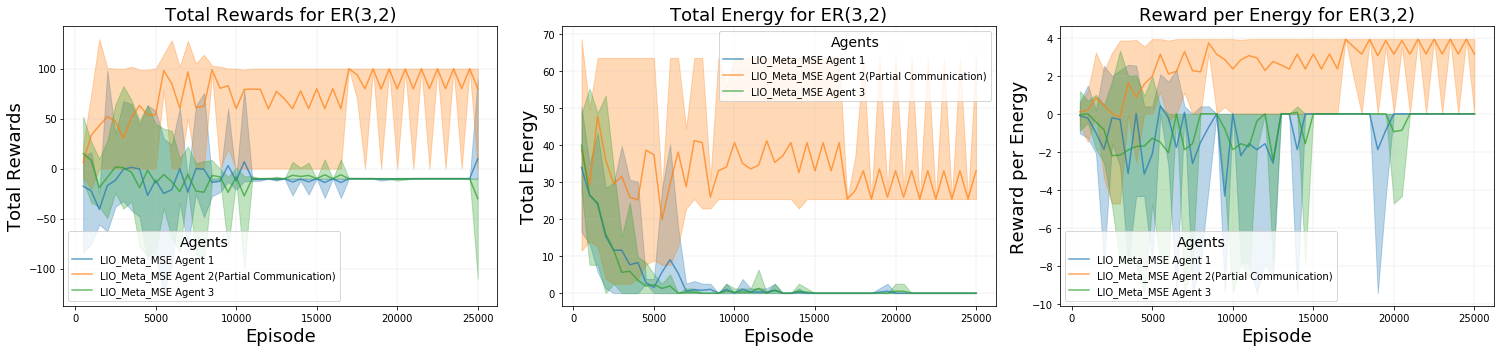

In [5]:
# Overall performance comparison of LIO_Meta_MSE in the ER(3,2) environment with greedy 2nd agent (Partial Communication)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need to change paths
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_MSE_Partial Communication_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.3, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.3, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.3, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO_Meta_MSE Agent {agent_id}{"(Partial Communication)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')




plt.tight_layout()
plt.show()

# Save the performance plot with bad energy agent
fig.savefig('lio_meta_mse_Partial Communication_overall.png', dpi=300)

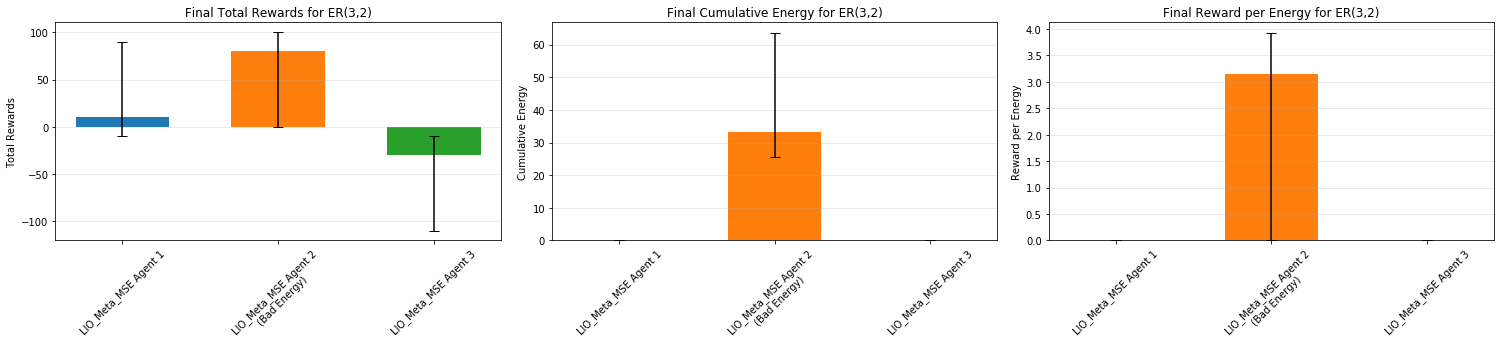

In [6]:
# Final cumulative performance comparison of LIO_Meta_MSE in the ER(3,2) environment with the greedy 2nd agent (Partial Communication)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data - only need LIO with bad energy agent
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Meta_MSE_Partial Communication_test_ER32/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
agents = ['LIO_Meta_MSE Agent 1', 'LIO_Meta_MSE Agent 2\n(Bad Energy)', 'LIO_Meta_MSE Agent 3']

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
finalr = np.zeros((len(df_all), 3))  # 3 agents
for idx, df in enumerate(df_all):
    finalr[idx, 0] = df['A1_reward_total'].values[-1]  
    finalr[idx, 1] = df['A2_reward_total'].values[-1]  
    finalr[idx, 2] = df['A3_reward_total'].values[-1]  

means_finalr = np.mean(finalr, axis=0)
mins_finalr = np.min(finalr, axis=0)
maxs_finalr = np.max(finalr, axis=0)

yerr_r = np.array([
    means_finalr - mins_finalr,  # lower errors
    maxs_finalr - means_finalr   # upper errors
])

# Create bars for rewards
x_pos = np.arange(len(agents))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr_r,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax1.set_title('Final Total Rewards for ER(3,2)', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(agents, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process energy data for second plot
finale = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finale[idx, 0] = df['A1_total_energy'].values[-1]
    finale[idx, 1] = df['A2_total_energy'].values[-1]
    finale[idx, 2] = df['A3_total_energy'].values[-1]

means_finale = np.mean(finale, axis=0)
mins_finale = np.min(finale, axis=0)
maxs_finale = np.max(finale, axis=0)

yerr_e = np.array([
    means_finale - mins_finale,
    maxs_finale - means_finale
])

# Create bars for energy
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yerr_e,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax2.set_title('Final Cumulative Energy for ER(3,2)', fontsize=12)
ax2.set_ylabel('Cumulative Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(agents, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
finalrpe = np.zeros((len(df_all), 3))
for idx, df in enumerate(df_all):
    finalrpe[idx, 0] = df['A1_reward_per_energy'].values[-1]
    finalrpe[idx, 1] = df['A2_reward_per_energy'].values[-1]
    finalrpe[idx, 2] = df['A3_reward_per_energy'].values[-1]

means_finalrpe = np.mean(finalrpe, axis=0)
mins_finalrpe = np.min(finalrpe, axis=0)
maxs_finalrpe = np.max(finalrpe, axis=0)

yerr_rpe = np.array([
    means_finalrpe - mins_finalrpe,
    maxs_finalrpe - means_finalrpe
])

# Create bars for reward per energy
bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerr_rpe,
    capsize=5,
    color=['tab:blue', 'tab:orange', 'tab:green'],
    width=0.6
)

ax3.set_title('Final Reward per Energy for ER(3,2)', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(agents, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('lio_meta_mse_Partial Communication_final.png', dpi=300)

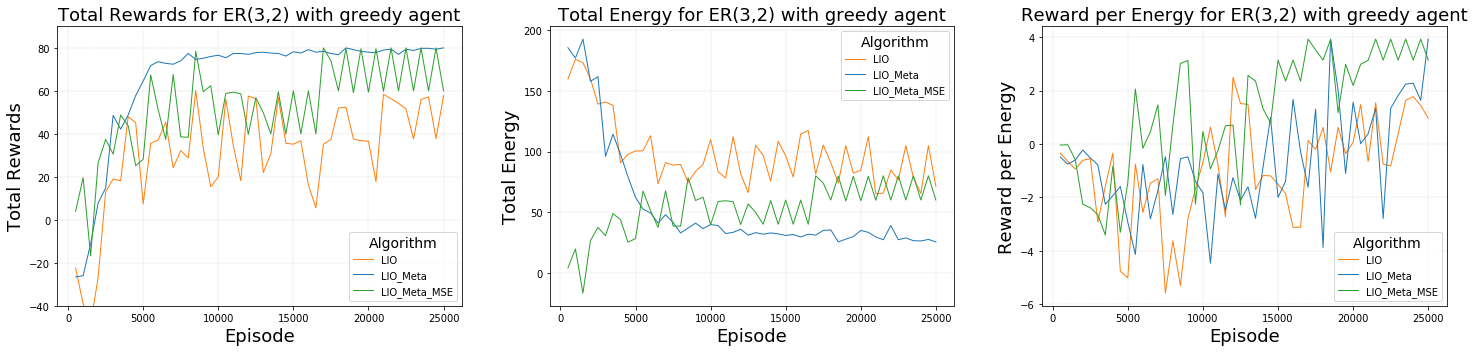

In [8]:
# Overall performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(3,2) environment with the greedy 2nd agent (Partial Communication)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_all_LIO = []
df_all_LIO_Meta = []
df_all_LIO_Meta_MSE = []
for i in range(5):
    df_all_LIO.append(pd.read_csv(f'lio/results/er%d/LIO_Partial Communication_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_Partial Communication_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta_MSE.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_MSE_Partial Communication_test_ER32/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_LIO + df_all_LIO_Meta + df_all_LIO_Meta_MSE])
t = df_all_LIO[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot: collective return
signal1 = np.zeros((len(df_all_LIO), min_length))  # LIO
signal2 = np.zeros((len(df_all_LIO_Meta), min_length))    # LIO_Meta
signal3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))    # LIO_Meta_MSE

# Fill arrays with data from each run
for idx, df in enumerate(df_all_LIO):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] + 
                   df['A3_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                    df['A3_reward_total'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    signal3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                   df['A3_reward_total'].values[:min_length])

# Plot 1: Total Rewards 
mins1 = np.min(signal1, axis=0)# Overall performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(3,2) environment with 2nd agent having bad energy
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)

mins3 = np.min(signal3, axis=0)
maxs3 = np.max(signal3, axis=0)
means3 = np.mean(signal3, axis=0)

# ax1.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:orange')
ax1.plot(t, means1, color='tab:orange', label='LIO', linewidth=1)
# ax1.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:blue')
ax1.plot(t, means2, color='tab:blue', label='LIO_Meta', linewidth=1)
# ax1.fill_between(t, mins3, maxs3, alpha=0.3, color='tab:blue')
ax1.plot(t, means3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(3,2) with greedy agent', fontsize=18)
ax1.legend(title='Algorithm', title_fontsize=14, loc='best')
ax1.set_ylim(-40, 90)

# Process collective energy data for second plot
energy1 = np.zeros((len(df_all_LIO), min_length)) # LIO
energy2 = np.zeros((len(df_all_LIO_Meta), min_length)) # LIO_Meta
energy3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length)) # LIO_Meta_MSE

for idx, df in enumerate(df_all_LIO):
    energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length] +
                   df['A3_total_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length] +
                   df['A3_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    energy3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                   df['A3_reward_total'].values[:min_length])


# Plot 2: Total Energy 
mins_e1 = np.min(energy1, axis=0)
maxs_e1 = np.max(energy1, axis=0)
means_e1 = np.mean(energy1, axis=0)

mins_e2 = np.min(energy2, axis=0)
maxs_e2 = np.max(energy2, axis=0)
means_e2 = np.mean(energy2, axis=0)

mins_e3 = np.min(energy3, axis=0)
maxs_e3 = np.max(energy3, axis=0)
means_e3 = np.mean(energy3, axis=0)

# ax2.fill_between(t, mins_e1, maxs_e1, alpha=0.3, color='tab:orange')
ax2.plot(t, means_e1, color='tab:orange', label='LIO', linewidth=1)
# ax2.fill_between(t, mins_e2, maxs_e2, alpha=0.3, color='tab:blue')
ax2.plot(t, means_e2, color='tab:blue', label='LIO_Meta', linewidth=1)
ax2.plot(t, means_e3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)


ax2.grid(color='silver', linestyle='--', linewidth=0.3)
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(3,2) with greedy agent', fontsize=18)
ax2.legend(title='Algorithm', title_fontsize=14, loc='best')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_LIO), min_length))
rpe2 = np.zeros((len(df_all_LIO_Meta), min_length))
rpe3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))

for idx, df in enumerate(df_all_LIO):
    rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    rpe3[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length])


# Plot 3: Reward per Energy 
mins_r1 = np.min(rpe1, axis=0)
maxs_r1 = np.max(rpe1, axis=0)
means_r1 = np.mean(rpe1, axis=0)

mins_r2 = np.min(rpe2, axis=0)
maxs_r2 = np.max(rpe2, axis=0)
means_r2 = np.mean(rpe2, axis=0)

mins_r3 = np.min(rpe3, axis=0)
maxs_r3 = np.max(rpe3, axis=0)
means_r3 = np.mean(rpe3, axis=0)

# ax3.fill_between(t, mins_r1, maxs_r1, alpha=0.3, color='tab:orange')
ax3.plot(t, means_r1, color='tab:orange', label='LIO', linewidth=1)
# ax3.fill_between(t, mins_r2, maxs_r2, alpha=0.3, color='tab:blue')
ax3.plot(t, means_r2, color='tab:blue', label='LIO_Meta', linewidth=1)
ax3.plot(t, means_r3, color='tab:green', label='LIO_Meta_MSE', linewidth=1)

ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(3,2) with greedy agent', fontsize=18)
ax3.legend(title='Algorithm', title_fontsize=14, loc='best')

plt.tight_layout()
plt.show()


# Save figure
fig.savefig('Overall_performance_Partial Communication.png', dpi=300)

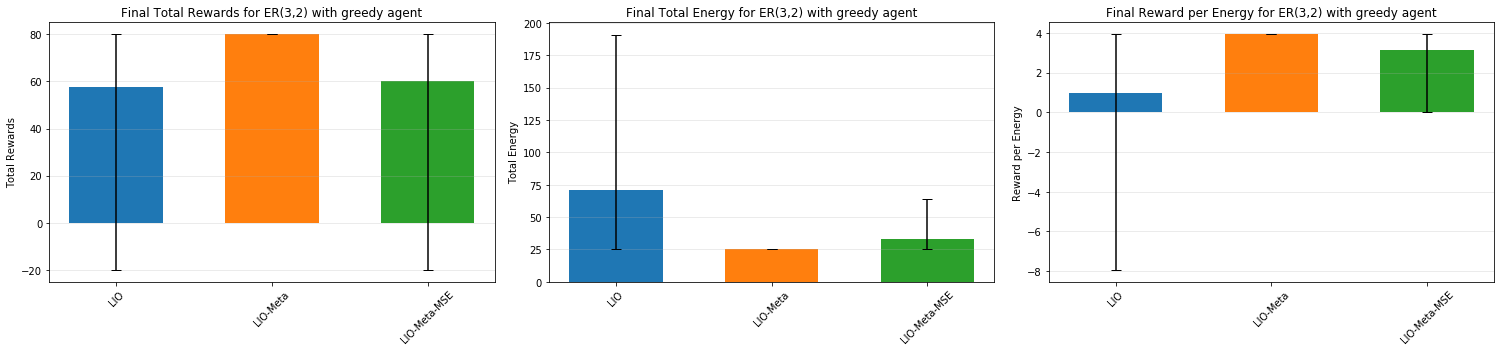

In [9]:
# Final cumulative performance comparison of LIO, LIO_Meta, and LIO_Meta_MSE in the ER(3,2) environment with the greedy 2nd agent (Partial Communication)
# Plot final performance of the three algorithms in bar charts
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# Load data
df_all_LIO = []
df_all_LIO_Meta = []
df_all_LIO_Meta_MSE = []
methods = ['LIO', 'LIO-Meta', 'LIO-Meta-MSE']
for i in range(5):
    df_all_LIO.append(pd.read_csv(f'lio/results/er%d/LIO_Partial Communication_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_Partial Communication_test_ER32/log.csv'%(i+1)))
    df_all_LIO_Meta_MSE.append(pd.read_csv(f'lio/results/er%d/LIO_Meta_MSE_Partial Communication_test_ER32/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_LIO + df_all_LIO_Meta + df_all_LIO_Meta_MSE])
t = df_all_LIO[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot: collective return
signal1 = np.zeros((len(df_all_LIO), min_length))  # LIO
signal2 = np.zeros((len(df_all_LIO_Meta), min_length))    # LIO_Meta
signal3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))    # LIO_Meta_MSE

# Fill arrays with data from each run
for idx, df in enumerate(df_all_LIO):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] + 
                   df['A3_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                    df['A3_reward_total'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    signal3[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] +
                   df['A3_reward_total'].values[:min_length])


# Plot 1: Total Rewards 
# Get the last episode data
finalr1 = signal1[:,-1]  # LIO
finalr2 = signal2[:,-1]  # LIO_Meta
finalr3 = signal3[:,-1]  # LIO_Meta_MSE

mins_finalr1 = np.min(finalr1, axis=0)
maxs_finalr1 = np.max(finalr1, axis=0)
means_finalr1 = np.mean(finalr1, axis=0)

mins_finalr2 = np.min(finalr2, axis=0)
maxs_finalr2 = np.max(finalr2, axis=0)
means_finalr2 = np.mean(finalr2, axis=0)

mins_finalr3 = np.min(finalr3, axis=0)
maxs_finalr3 = np.max(finalr3, axis=0)
means_finalr3 = np.mean(finalr3, axis=0)

means_finalr = [means_finalr1,  means_finalr2, means_finalr3]
yerr = np.array([
    [means_finalr1 - mins_finalr1, means_finalr2 - mins_finalr2, means_finalr3 - mins_finalr3],  # lower errors
    [maxs_finalr1 - means_finalr1, maxs_finalr2 - means_finalr2, maxs_finalr3 - means_finalr3]   # upper errors
])


# Create bars
x_pos = np.arange(len(methods))
bars = ax1.bar(
    x_pos, 
    means_finalr,
    yerr=yerr,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax1.set_title('Final Total Rewards for ER(3,2) with greedy agent', fontsize=12)
ax1.set_ylabel('Total Rewards', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(methods, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Process collective energy data for second plot
energy1 = np.zeros((len(df_all_LIO), min_length)) # LIO
energy2 = np.zeros((len(df_all_LIO_Meta), min_length)) # LIO_Meta
energy3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length)) # LIO_Meta_MSE



for idx, df in enumerate(df_all_LIO):
    energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length]
                   + df['A3_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta):
    energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length]
                   + df['A3_total_energy'].values[:min_length])
    
for idx, df in enumerate(df_all_LIO_Meta_MSE):
    energy3[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length]
                   + df['A3_total_energy'].values[:min_length])


# Plot 2: Total Energy
# Get the last episode data
finale1 = energy1[:,-1]  # LIO
finale2 = energy2[:,-1]  # LIO_Meta
finale3 = energy3[:,-1]  # LIO_Meta_MSE

mins_finale1 = np.min(finale1, axis=0)
maxs_finale1 = np.max(finale1, axis=0)
means_finale1 = np.mean(finale1, axis=0)

mins_finale2 = np.min(finale2, axis=0)
maxs_finale2 = np.max(finale2, axis=0)
means_finale2 = np.mean(finale2, axis=0)

mins_finale3 = np.min(finale3, axis=0)
maxs_finale3 = np.max(finale3, axis=0)
means_finale3 = np.mean(finale3, axis=0)

means_finale = [means_finale1,  means_finale2, means_finale3]
yere = np.array([
    [means_finale1 - mins_finale1, means_finale2 - mins_finale2, means_finale3 - mins_finale3],  # lower errors
    [maxs_finale1 - means_finale1, maxs_finale2 - means_finale2, maxs_finale3 - means_finale3]   # upper errors
])


# Create bars
x_pos = np.arange(len(methods))
bars = ax2.bar(
    x_pos, 
    means_finale,
    yerr=yere,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax2.set_title('Final Total Energy for ER(3,2) with greedy agent', fontsize=12)
ax2.set_ylabel('Total Energy', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(methods, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_LIO), min_length))
rpe2 = np.zeros((len(df_all_LIO_Meta), min_length))
rpe3 = np.zeros((len(df_all_LIO_Meta_MSE), min_length))

for idx, df in enumerate(df_all_LIO):
    rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length]
                   + df['A3_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta):
    rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length]
                   + df['A3_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Meta_MSE):
    rpe3[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length]
                   + df['A3_reward_per_energy'].values[:min_length])
    

# Plot 3: Reward per Energy
# Get the last episode data
finalrpe1 = rpe1[:,-1]  # LIO
finalrpe2 = rpe2[:,-1]  # LIO_Meta
finalrpe3 = rpe3[:,-1]  # LIO_Meta_MSE

mins_finalrpe1 = np.min(finalrpe1, axis=0)
maxs_finalrpe1 = np.max(finalrpe1, axis=0)
means_finalrpe1 = np.mean(finalrpe1, axis=0)

mins_finalrpe2 = np.min(finalrpe2, axis=0)
maxs_finalrpe2 = np.max(finalrpe2, axis=0)
means_finalrpe2 = np.mean(finalrpe2, axis=0)

mins_finalrpe3 = np.min(finalrpe3, axis=0)
maxs_finalrpe3 = np.max(finalrpe3, axis=0)
means_finalrpe3 = np.mean(finalrpe3, axis=0)

means_finalrpe = [means_finalrpe1,  means_finalrpe2, means_finalrpe3]
yerrpe = np.array([
    [means_finalrpe1 - mins_finalrpe1, means_finalrpe2 - mins_finalrpe2, means_finalrpe3 - mins_finalrpe3],  # lower errors
    [maxs_finalrpe1 - means_finalrpe1, maxs_finalrpe2 - means_finalrpe2, maxs_finalrpe3 - means_finalrpe3]   # upper errors
])




# Create bars
x_pos = np.arange(len(methods))

bars = ax3.bar(
    x_pos, 
    means_finalrpe,
    yerr=yerrpe,
    capsize=5,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.6
)

# Customize plot
ax3.set_title('Final Reward per Energy for ER(3,2) with greedy agent', fontsize=12)
ax3.set_ylabel('Reward per Energy', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(methods, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

# Save the final performance plots
fig.savefig('final_performance_Partial Communication.png', dpi=300)